This is a python implementation of k-means with random restart

input: 
1. the parameter k of the target number of clusters
2. the number r of random restarts
3. a flag value 0 or 1 for compact or verbose output
4. data is either a .csv file or a random data sample generated from gaussian processes

In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import random
import copy
import pandas as pd
import math

In [ ]:
#This block has several gaussian processes to generate sample data
#Experiment 1: generating 60 datapoints randomly in 2 dimensions. we have 3 gaussian processes with mu1, mu2, mu3 values and each generating 20 data points
sigma = 1.0
mu1 = [0.0,0.0]
mu2 = [6.0,0.0]
mu3 = [3.0,3*math.sqrt(3)]
s1 = np.random.normal(mu1, sigma, (20,2))
s2 = np.random.normal(mu2, sigma, (20,2))
s3 = np.random.normal(mu3, sigma, (20,2))

x1,y1 = s1.T
plt.scatter(x1,y1)
x2,y2 = s2.T
plt.scatter(x2,y2)
x3,y3 = s3.T
plt.scatter(x3,y3)
plt.show()

s = np.append(s1,np.append(s2,s3,axis=0),axis = 0)
n, d = s.shape

# #Experiment 2: similar to experiment 1
# sigma = 2.0
# mu1 = [0.0,0.0]
# mu2 = [2.0,0.0]
# mu3 = [1.0,math.sqrt(3)]
# s1 = np.random.normal(mu1, sigma, (20,2))
# s2 = np.random.normal(mu2, sigma, (20,2))
# s3 = np.random.normal(mu3, sigma, (20,2))
# s = np.append(s1,np.append(s2,s3,axis=0),axis = 0)

# x1,y1 = s1.T
# plt.scatter(x1,y1)
# x2,y2 = s2.T
# plt.scatter(x2,y2)
# x3,y3 = s3.T
# plt.scatter(x3,y3)
# plt.show()

# n, d = s.shape

# #Experiment 3: similar to experiment 1 except there is only 1 gaussian process generating 60 data points
# sigma = 2.0
# mu1 = [0.0,0.0]
# s = np.random.normal(mu1, sigma, (60,2))

# x1,y1 = s.T
# plt.scatter(x1,y1)
# plt.show()


# n, d = s.shape

# #experiment 4: similar to experiemnt 1 except the data is now in 100 dimensions
# sigma = 1.0
# mu1 = [0.0]*100
# mu2 = [60.0] + [0.0]*99
# mu3 = [30.0, 30*math.sqrt(3)] + [0.0]*98
# s1 = np.random.normal(mu1, sigma, (20,100))
# s2 = np.random.normal(mu2, sigma, (20,100))
# s3 = np.random.normal(mu3, sigma, (20,100))
# s = np.append(s1,np.append(s2,s3,axis=0),axis = 0)

# n, d = s.shape

# #experiment 5:
# sigma = 1.0
# mu1 = [0.0]*100
# mu2 = [6.0] + [0.0]*99
# mu3 = [3.0, 3*math.sqrt(3)] + [0.0]*98
# s1 = np.random.normal(mu1, sigma, (20,100))
# s2 = np.random.normal(mu2, sigma, (20,100))
# s3 = np.random.normal(mu3, sigma, (20,100))
# s = np.append(s1,np.append(s2,s3,axis=0),axis = 0)

# n, d = s.shape

# #experiment 6:
# sigma = 2.0
# mu1 = [0.0]*100
# mu2 = [2.0] + [0.0]*99
# mu3 = [1.0, math.sqrt(3)] + [0.0]*98
# s1 = np.random.normal(mu1, sigma, (20,100))
# s2 = np.random.normal(mu2, sigma, (20,100))
# s3 = np.random.normal(mu3, sigma, (20,100))
# s = np.append(s1,np.append(s2,s3,axis=0),axis = 0)

# n, d = s.shape

# #experiment 7:
# sigma = 2.0
# mu1 = [0.0]*100
# s = np.random.normal(mu1, sigma, (60,100))

# n, d = s.shape

In [2]:
#run if using .csv file.

#program assumes that the input csv file doesnot have headers, as given in sample in/outputs in question.
file1 = pd.read_csv('abcd.csv', header=None)
print(file1)

#number of dimensions d of the data points = number of columns in csv - 1
#we also need d to get d_list which is used for 'usecols' in genfromtxt function
d = len(file1.axes[1]) - 1
d_list = [item for item in range(1,d+1)]

#create a single ndarray 's' of all data points' coordinates and another array 's2' of their identifiers
s = np.genfromtxt("abcd.csv", dtype = np.float64, delimiter = ",", usecols = d_list, autostrip = True)
s2 = np.genfromtxt("abcd.csv", dtype = np.str, delimiter = ",", usecols = (0))
n, d = s.shape
print(n,d)

   0     1    2
0  A   0.0  4.0
1  B   1.0  5.0
2  C   8.0  0.0
3  D   9.1  0.0
4  E  16.0  4.1
5  F  15.0  5.1
6 2


In [3]:
k1 = int(input("number of cluster:"))
r1 = int(input("number of random restarts:"))
v1 = int(input("enter 1 for verbose output else 0:"))

def kmeans(k, s, v, r):
    centers = [ [0.0]*d for i in range(k)]
    iterations = 0
    flag = 0
    clusters = [ [] for i in range(k)]
    
    two_k = random.sample(range(0,n),2*k)
    #print(two_k)
    
    cluster_number = 0
    for i in range(0,2*k,2):
        clusters[cluster_number].append(two_k[i])
        clusters[cluster_number].append(two_k[i+1])
        cluster_number = cluster_number + 1
    #print(clusters)   
    
    for i in range(n):
        if i not in two_k:
            x = random.randint(0,k-1)
            clusters[x].append(i)
    
    #print random restart counter if verbose = 1
    if v == 1:
        print("random restart count: ",r+1)
    
    while flag == 0:  #kmeans loop
        iterations = iterations + 1
        
        #we find the centers from clusters formed in previous iteration of the while loop
        #if its the first iteration, it finds centers from the clusters randomly formed just before the while loop
        for i in range(k):
            d_sum = [0.0]*d
            length = len(clusters[i])
            for j in clusters[i]:
                for di in range(d):
                    d_sum[di] = d_sum[di] + s[j][di]
            d_mean = [0.0]*d
            for di in range(d):
                d_mean[di] = d_sum[di] / length
            centers[i] = d_mean
        
        #calculate cost
        c = 0.0
        for j in range(k):
            for j2 in clusters[j]:
                for di in range(d):
                    y = (s[j2][di] - centers[j][di])**2
                    c = c + y
        
        #if verbose = 1 and d = 2, we print and plot every iteration
        if v==1 and d<=2:
            for each in clusters:
                ind = clusters.index(each)
                print("cluster",ind+1,": ")
                datapoints = []
                for each1 in each:
                    print(s[each1])
                    datapoints.append(s[each1])
                print("the center:",centers[ind])
                datapoints2 = np.array(datapoints)
                x6,y6 = datapoints2.T
                plt.scatter(x6,y6)
            temp1 = np.array(centers)
            x7,y7 = temp1.T
            plt.scatter(x7,y7)
            plt.show()
            print("Cost: ",c)
            print("******************************")
        #if verbose = 1 and d>2, we just print every iteration
        elif v==1 and d>2:
            for each in clusters:
                ind = clusters.index(each)
                print("cluster",ind+1,": ")
                for each1 in each:
                    print(s[each1])
                print("the center:",centers[ind])
                print("Cost: ",c)
                print("******************************")
                
        #we save a copy of the clusters from previous iteration to compare later with the new clusters we-
        #-form just below. the new clusters are formed from scratch based on the new centers found above.
        clusters_save = copy.deepcopy(clusters)
        clusters = [ [] for i in range(k)]
        
        #Each data point's distance from each center is calculated.
        for i in range(n):
            #shortest_dist = float('inf')
            shortest_dist = np.inf
            for j in range(k):
                #calculate distance as sum_of_sq between datapoint 's[i]' and center 'centers[j]'
                sum_of_sq = 0.0
                for di in range(d):
                    x = (s[i][di] - centers[j][di])**2
                    sum_of_sq = sum_of_sq + x
                #datapoint allocated to the cluster whose center is nearest to that datapoint
                if sum_of_sq < shortest_dist:
                    shortest_dist = sum_of_sq
                    new_center_index = j
            #append i to clusters[new_center_index]
            clusters[new_center_index].append(i)
        
        #we remove empty clusters, their corresponding centers and update k accordingly
        try:
            while True:
                idx = clusters.index([])
                del clusters[idx]
                del centers[idx]
                #clusters.remove([])
                k = k - 1
        except ValueError:
            pass
        
        #if the new clusters are the same as old copy then we stop
        if clusters == clusters_save:
            flag = 1
            
    clusters_return = copy.deepcopy(clusters)
    centers_return = copy.deepcopy(centers)
    k_real = copy.deepcopy(k)
    return [clusters_return, centers_return, k_real, iterations]

def randomrestart(k, s, v, r):
    real_cost = np.inf
    mean_iterations = 0
    starvation_count = 0
    for i in range(r):
        r_pass = copy.deepcopy(i)
        [clustering, centroids, k_real, num_iterations] = kmeans(k, s, v, r_pass)
        cost = 0.0
        for j in range(k_real):
            for j2 in clustering[j]:
                for di in range(d):
                    y = (s[j2][di] - centroids[j][di])**2
                    cost = cost + y
        if cost < real_cost:
            real_cost = copy.deepcopy(cost)
            real_clustering = copy.deepcopy(clustering)
            real_centroids = copy.deepcopy(centroids)
        mean_iterations = mean_iterations + num_iterations
        if len(real_clustering) < k1:
            starvation_count = starvation_count + 1
    print("---------------------------Best clustering found---------------------------: ")
    print("number of times kmeans returns less than k clusters: ",starvation_count)
    print("average number of iterations: ",mean_iterations/r)
    print("---------------------------")
    
    #real_clustering, clusters etc.. are just indices of data points actually stored in s.
    #we generate final clusters using s that contain actual corrdinates instead of indices.
    #we then convert them into ndarray and plot using matplotlib.
    #centers, centroids, real_centroids etc are already coordinates of the centers, so we can directly plot them
    if d == 2:
        for each in real_clustering:
            print("cluster",real_clustering.index(each)+1,": ")
            datapoints = []
            for each1 in each:
                print(s[each1])
                datapoints.append(s[each1])
            datapoints2 = np.array(datapoints)
            x4,y4 = datapoints2.T
            plt.scatter(x4,y4)
        temp = np.array(real_centroids)
        x5,y5 = temp.T
        plt.scatter(x5,y5)
        plt.show()
    else:
        for each in real_clustering:
            print("cluster",real_clustering.index(each)+1,": ")
            for each1 in each:
                print(s[each1])
    print("---------------------------")
    print("their final centers: ",real_centroids)
    print("---------------------------")
    print("Cost: ",real_cost)
    print("---------------------------")

number of cluster:3
number of random restarts:10
enter 1 for verbose output else 0:1


random restart count:  1
cluster 1 : 
[9.1 0. ]
[1. 5.]
the center: [5.05, 2.5]
cluster 2 : 
[16.   4.1]
[0. 4.]
the center: [8.0, 4.05]
cluster 3 : 
[15.   5.1]
[8. 0.]
the center: [11.5, 2.55]


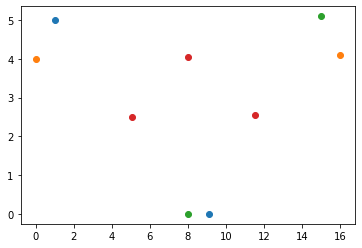

Cost:  210.815
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]


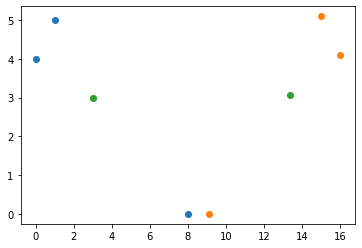

Cost:  94.41333333333331
******************************
random restart count:  2
cluster 1 : 
[8. 0.]
[15.   5.1]
the center: [11.5, 2.55]
cluster 2 : 
[0. 4.]
[1. 5.]
the center: [0.5, 4.5]
cluster 3 : 
[16.   4.1]
[9.1 0. ]
the center: [12.55, 2.05]


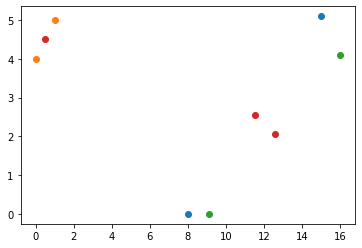

Cost:  70.715
******************************
cluster 1 : 
[8. 0.]
[9.1 0. ]
the center: [8.55, 0.0]
cluster 2 : 
[0. 4.]
[1. 5.]
the center: [0.5, 4.5]
cluster 3 : 
[16.   4.1]
[15.   5.1]
the center: [15.5, 4.6]


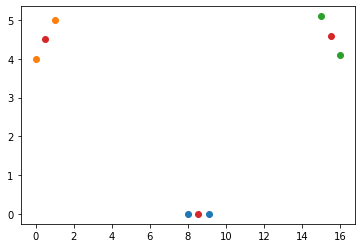

Cost:  2.6049999999999995
******************************
random restart count:  3
cluster 1 : 
[8. 0.]
[1. 5.]
the center: [4.5, 2.5]
cluster 2 : 
[15.   5.1]
[0. 4.]
the center: [7.5, 4.55]
cluster 3 : 
[16.   4.1]
[9.1 0. ]
the center: [12.55, 2.05]


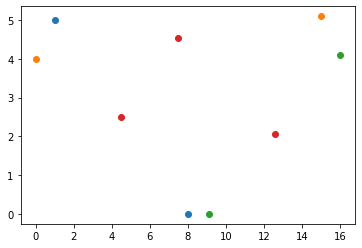

Cost:  182.315
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]


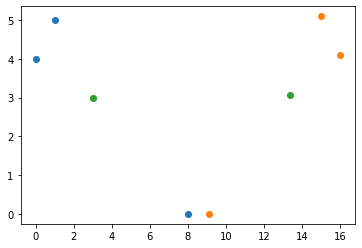

Cost:  94.41333333333331
******************************
random restart count:  4
cluster 1 : 
[0. 4.]
[15.   5.1]
the center: [7.5, 4.55]
cluster 2 : 
[1. 5.]
[8. 0.]
the center: [4.5, 2.5]
cluster 3 : 
[9.1 0. ]
[16.   4.1]
the center: [12.55, 2.05]


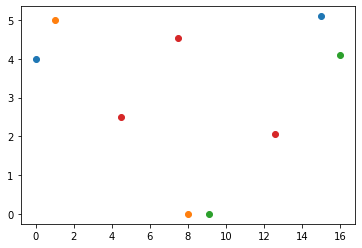

Cost:  182.315
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]


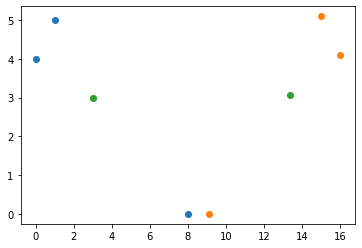

Cost:  94.41333333333331
******************************
random restart count:  5
cluster 1 : 
[0. 4.]
[8. 0.]
the center: [4.0, 2.0]
cluster 2 : 
[16.   4.1]
[9.1 0. ]
the center: [12.55, 2.05]
cluster 3 : 
[1. 5.]
[15.   5.1]
the center: [8.0, 5.05]


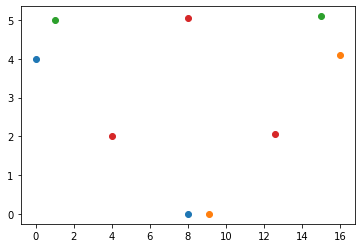

Cost:  170.215
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]


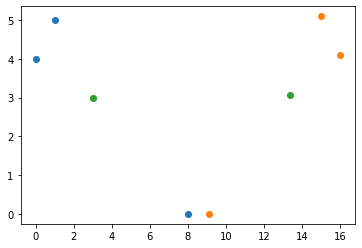

Cost:  94.41333333333331
******************************
random restart count:  6
cluster 1 : 
[15.   5.1]
[1. 5.]
the center: [8.0, 5.05]
cluster 2 : 
[9.1 0. ]
[0. 4.]
the center: [4.55, 2.0]
cluster 3 : 
[8. 0.]
[16.   4.1]
the center: [12.0, 2.05]


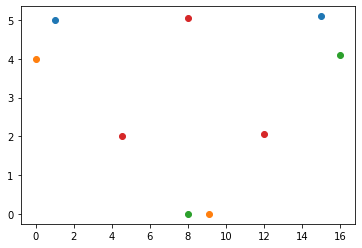

Cost:  187.81499999999997
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]


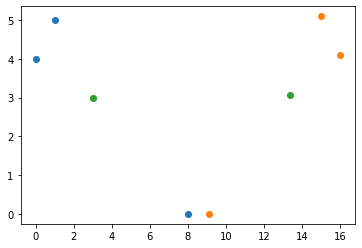

Cost:  94.41333333333331
******************************
random restart count:  7
cluster 1 : 
[0. 4.]
[1. 5.]
the center: [0.5, 4.5]
cluster 2 : 
[9.1 0. ]
[8. 0.]
the center: [8.55, 0.0]
cluster 3 : 
[15.   5.1]
[16.   4.1]
the center: [15.5, 4.6]


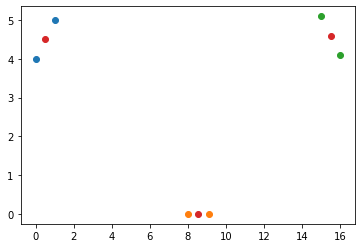

Cost:  2.6049999999999995
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
the center: [0.5, 4.5]
cluster 2 : 
[8. 0.]
[9.1 0. ]
the center: [8.55, 0.0]
cluster 3 : 
[16.   4.1]
[15.   5.1]
the center: [15.5, 4.6]


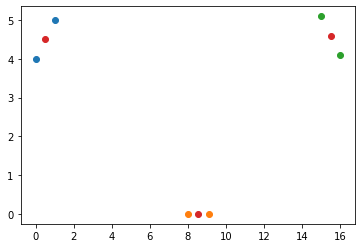

Cost:  2.6049999999999995
******************************
random restart count:  8
cluster 1 : 
[8. 0.]
[16.   4.1]
the center: [12.0, 2.05]
cluster 2 : 
[9.1 0. ]
[1. 5.]
the center: [5.05, 2.5]
cluster 3 : 
[15.   5.1]
[0. 4.]
the center: [7.5, 4.55]


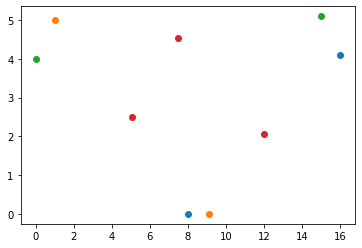

Cost:  198.81500000000003
******************************
cluster 1 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]
cluster 2 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]


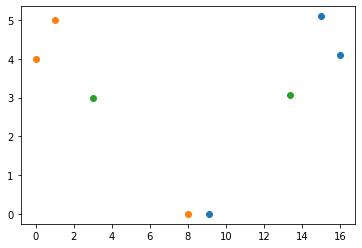

Cost:  94.41333333333334
******************************
random restart count:  9
cluster 1 : 
[8. 0.]
[1. 5.]
the center: [4.5, 2.5]
cluster 2 : 
[15.   5.1]
[0. 4.]
the center: [7.5, 4.55]
cluster 3 : 
[9.1 0. ]
[16.   4.1]
the center: [12.55, 2.05]


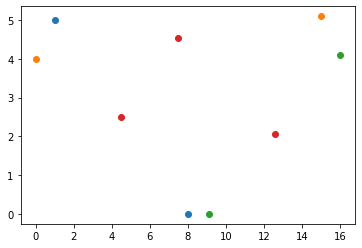

Cost:  182.315
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
[8. 0.]
the center: [3.0, 3.0]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]


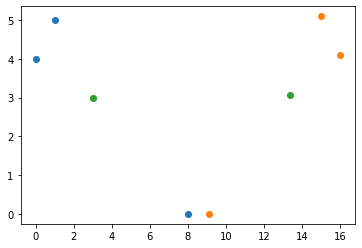

Cost:  94.41333333333331
******************************
random restart count:  10
cluster 1 : 
[8. 0.]
[1. 5.]
the center: [4.5, 2.5]
cluster 2 : 
[9.1 0. ]
[15.   5.1]
the center: [12.05, 2.55]
cluster 3 : 
[0. 4.]
[16.   4.1]
the center: [8.0, 4.05]


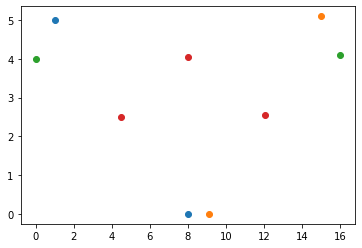

Cost:  195.415
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
the center: [0.5, 4.5]
cluster 2 : 
[9.1 0. ]
[16.   4.1]
[15.   5.1]
the center: [13.366666666666667, 3.0666666666666664]
cluster 3 : 
[8. 0.]
the center: [8.0, 0.0]


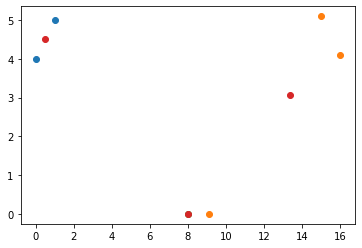

Cost:  43.41333333333334
******************************
cluster 1 : 
[0. 4.]
[1. 5.]
the center: [0.5, 4.5]
cluster 2 : 
[16.   4.1]
[15.   5.1]
the center: [15.5, 4.6]
cluster 3 : 
[8. 0.]
[9.1 0. ]
the center: [8.55, 0.0]


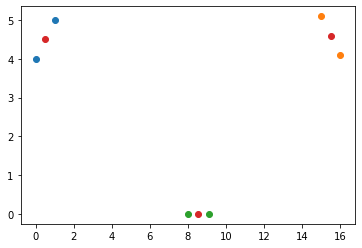

Cost:  2.6049999999999995
******************************
---------------------------Best clustering found---------------------------: 
number of times kmeans returns less than k clusters:  1
average number of iterations:  2.1
---------------------------
cluster 1 : 
[8. 0.]
[9.1 0. ]
cluster 2 : 
[0. 4.]
[1. 5.]
cluster 3 : 
[16.   4.1]
[15.   5.1]


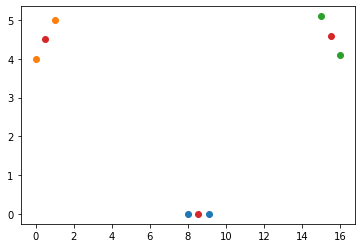

---------------------------
their final centers:  [[8.55, 0.0], [0.5, 4.5], [15.5, 4.6]]
---------------------------
Cost:  2.6049999999999995
---------------------------


In [4]:
randomrestart(k1,s,v1,r1)